In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


import random

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,make_scorer

import joblib

#**Data Collecting**

In [ ]:
df = pd.read_csv('Hotel Reservations.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.drop(columns=['Booking_ID', 'type_of_meal_plan','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

#**Data Cleaning**

##**Handling Missing Value**

In [ ]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
avg_price_per_room,0
no_of_special_requests,0
booking_status,0


##**Handling Duplicate Value**

In [ ]:
df.duplicated().sum()

11351

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(24924, 10)

##**Handling Outler**


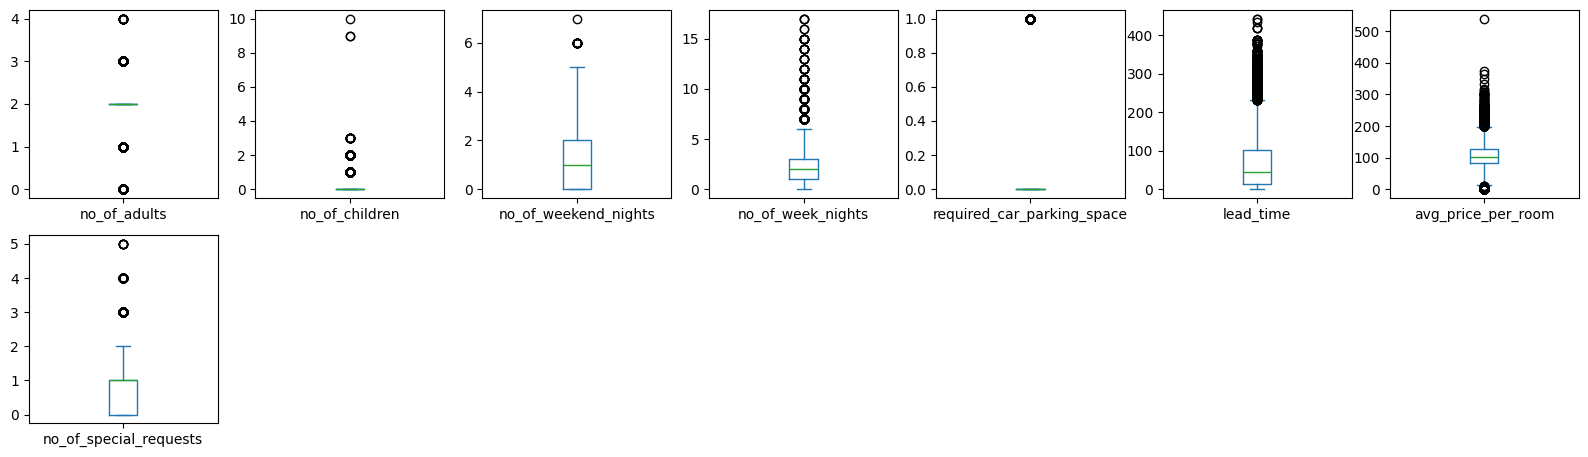

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (7, 7))
plt.show()

<Axes: xlabel='lead_time'>

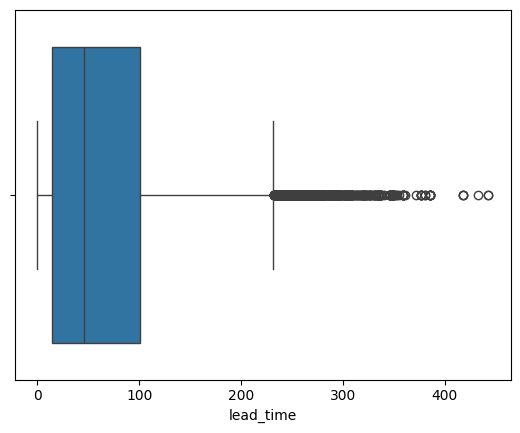

In [ ]:
sns.boxplot(data= df, x='lead_time')

<Axes: xlabel='lead_time'>

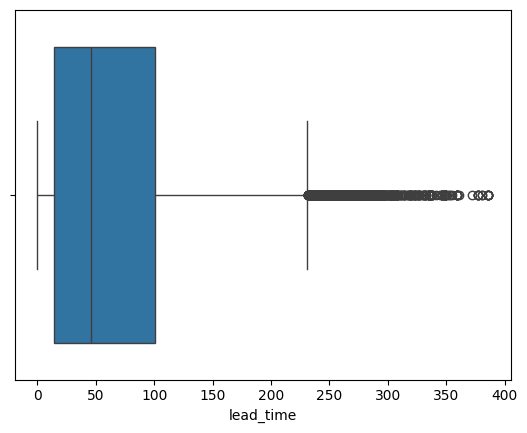

In [ ]:
df = df[df['lead_time'] <= 400]
sns.boxplot(data= df, x='lead_time')

<Axes: xlabel='avg_price_per_room'>

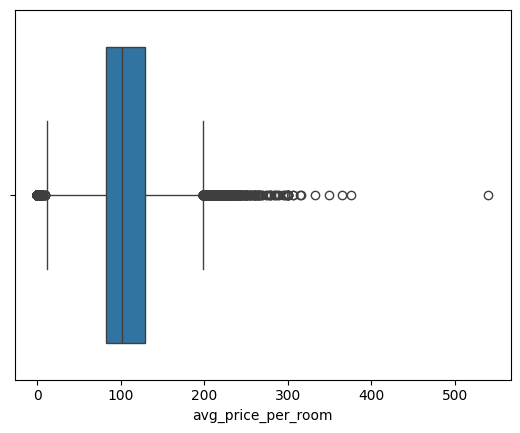

In [ ]:
sns.boxplot(data= df, x='avg_price_per_room')

<Axes: xlabel='avg_price_per_room'>

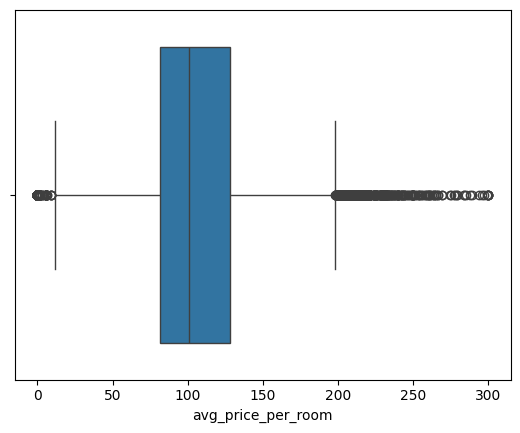

In [ ]:
df = df[df['avg_price_per_room'] <= 300]
sns.boxplot(data= df, x='avg_price_per_room')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,24909.0,1.908387,0.521458,0.0,2.00,2.00,2.0,4.0
no_of_children,24909.0,0.146453,0.470067,0.0,0.00,0.00,0.0,10.0
no_of_weekend_nights,24909.0,0.902003,0.890319,0.0,0.00,1.00,2.0,7.0
no_of_week_nights,24909.0,2.301257,1.521108,0.0,1.00,2.00,3.0,17.0
required_car_parking_space,24909.0,0.042274,0.201217,0.0,0.00,0.00,0.0,1.0
lead_time,24909.0,67.308322,67.468090,0.0,14.00,46.00,101.0,386.0
avg_price_per_room,24909.0,106.804907,37.208373,0.0,81.62,101.18,128.2,300.0
no_of_special_requests,24909.0,0.760769,0.819542,0.0,0.00,1.00,1.0,5.0


In [ ]:
df.nunique()

,0
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
required_car_parking_space,2
room_type_reserved,7
lead_time,349
avg_price_per_room,3922
no_of_special_requests,6
booking_status,2


#**Data Transformation**

##**Scalling**

###**Normalisasi**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
continuous_columns = ['lead_time']
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

##**Encoding**

###**Ordinal Encoding**

In [ ]:
encoder = OrdinalEncoder()
df["room_type_reserved"] = encoder.fit_transform(df[["room_type_reserved"]])

#**Feature Engineering**

In [ ]:
df['booking_status'] = df['booking_status'].map({'Canceled': 'Not Recommended', 'Not_Canceled': 'Recommended'})
df.rename(columns={'booking_status': 'status'}, inplace=True)

In [ ]:
df['avg_price_per_room_rupiah'] = df['avg_price_per_room'] * 16000
df = df.drop('avg_price_per_room', axis=1)

#**Imbalance Data**

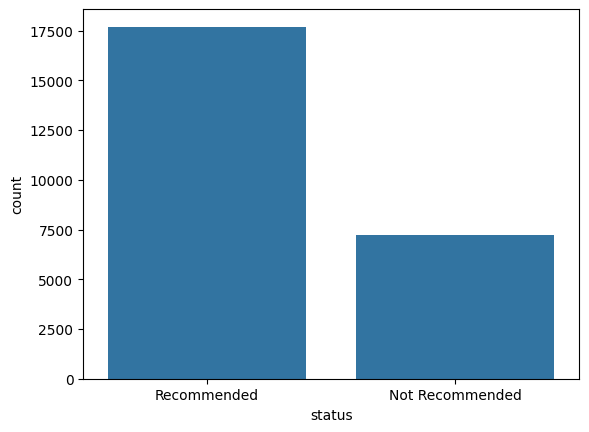

In [ ]:
sns.countplot(data=df, x='status')
plt.show()

#**Data Splitting**

In [ ]:
X = df.drop(columns='status')
Y = df['status']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#**Oversampling**

In [ ]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [ ]:
print(pd.Series(y_train_res).value_counts())

status
Not Recommended    13235
Recommended        13235
Name: count, dtype: int64


#**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
path = model.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.        , 0.        , ..., 0.01726827, 0.0248416 ,
       0.04646644])

In [ ]:
alphas_list = alphas.tolist()
random_values = random.sample(alphas_list, 10)
random_values

[7.137376657209642e-05,
 7.137376657209642e-05,
 8.029548739360848e-05,
 4.683903431293828e-05,
 4.6392948271862664e-05,
 1.7843441643024098e-05,
 0.00010922786949090087,
 6.0457778743422836e-05,
 6.9589422407794e-05,
 5.38128556234642e-05]

In [ ]:
params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'ccp_alpha': random_values,
}

f1_scorer = make_scorer(f1_score, pos_label='Recommended')

grid = GridSearchCV(
    estimator= model,
    param_grid= params,
    scoring= f1_scorer,
    cv=5,
)
grid.fit(x_train, y_train)

grid.best_params_

{'ccp_alpha': 7.137376657209642e-05, 'criterion': 'gini', 'max_depth': 6}

In [ ]:
model = DecisionTreeClassifier(criterion=grid.best_params_['criterion'],
                               max_depth=grid.best_params_['max_depth'],
                               ccp_alpha=grid.best_params_['ccp_alpha'])
model.fit(x_train, y_train)
preds_model = model.predict(x_test)

In [ ]:
yTrain_pred = model.predict(x_train)
f1_score(y_train, yTrain_pred,pos_label='Recommended')

0.8791069479170335

In [ ]:
f1_score(y_test, preds_model,pos_label='Recommended')

0.8818105616093881

#**Ringkasan Model**

In [ ]:
f1_model = f1_score(y_test, preds_model,pos_label='Recommended')
f1_model

0.8818105616093881

In [ ]:
accuracy_model = accuracy_score(y_test, preds_model)
accuracy_model

0.8188824662813102

In [ ]:
precision_model = precision_score(y_test, preds_model,pos_label='Recommended')
precision_model

0.8276947285601888

In [ ]:
recall_model = recall_score(y_test, preds_model,pos_label='Recommended')
recall_model

0.9434977578475336

In [ ]:
joblib.dump(model, 'hotel.pkl')

['hotel.pkl']

In [57]:
df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,no_of_special_requests,status,avg_price_per_room_rupiah
0,2,0,1,2,0,0.0,0.580311,0,Recommended,1040000.0
1,2,0,2,3,0,0.0,0.012953,1,Recommended,1706880.0
2,1,0,2,1,0,0.0,0.002591,0,Not Recommended,960000.0
3,2,0,0,2,0,0.0,0.546632,0,Not Recommended,1600000.0
4,2,0,1,1,0,0.0,0.124352,0,Not Recommended,1512000.0
5,2,0,0,2,0,0.0,0.896373,1,Not Recommended,1840000.0
6,2,0,1,3,0,0.0,0.088083,1,Recommended,1720800.0
7,2,0,1,3,0,3.0,0.215026,1,Recommended,1689760.0
8,3,0,0,4,0,0.0,0.313472,1,Recommended,1550400.0
9,2,0,0,5,0,3.0,0.113990,3,Recommended,2135040.0


In [65]:
import pandas as pd  # Make sure pandas is imported

predictions = model.predict(pd.DataFrame([[5, 0,0, 2, 0, 0, 100, 0, 1600000]],
                                        columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                                                 'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
                                                 'lead_time', 'no_of_special_requests', 'avg_price_per_room_rupiah']))
predictions

array(['Recommended'], dtype=object)

In [49]:
feature_names = x_train.columns
feature_names

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'no_of_special_requests', 'avg_price_per_room_rupiah'],
      dtype='object')